In [1]:
import sys, os
import numpy as np

sys.path.append(os.path.join(os.path.pardir, 'python'))
from tcg_slb.phasediagram import PETScPDReactiveODE, PDReactiveGrid, PDReactiveGridDiagnostics
from tcg_slb.base import *

%matplotlib widget

In [2]:
pv = repr(sys.version_info.major)+'.'+repr(sys.version_info.minor)
sys.path.append(os.path.join(os.path.pardir, 'database', 'install', 'MgSiAlAlO3_all_slb_rx', 'lib', 'python'+pv, 'site-packages'))

import py_MgSiAlAlO3_all_slb_rx as tcgdb
rxn = tcgdb.MgSiAlAlO3_all_slb_rx()
rxn.report()

Reaction object: MgSiAlAlO3_all_slb_rx

Phase 0 MgAlPerovskite_slb_ph (mgalpv)
     Endmember 0 MgPerovskite_slb_em : MgSiO3_(mgalpv)
     Endmember 1 AlPerovskite_slb_em : Al2O3_(mgalpv)
Phase 1 MgAlAkimotoite_slb_ph (mgalak)
     Endmember 0 MgAkimotoite_slb_em : MgSiO3_(mgalak)
     Endmember 1 AlAkimotoite_slb_em : Al2O3_(mgalak)
Phase 2 MgWadsleyite_slb_ph (mgwa)
     Endmember 0 MgWadsleyite_slb_em : Mg2SiO4_(mgwa)
Phase 3 Stishovite_slb_ph (st)
     Endmember 0 Stishovite_slb_em : SiO2_(st)
Phase 4 MgAlGarnet_slb_ph (mgalgt)
     Endmember 0 Pyrope_slb_em : Mg3Al2Si3O12_(mgalgt)
     Endmember 1 MgMajorite_slb_em : Mg4Si4O12_(mgalgt)
Phase 5 HPClinoenstatite_slb_ph (hpcen)
     Endmember 0 HPClinoenstatite_slb_em : Mg2Si2O6_(hpcen)
Phase 6 MgAlOrthopyroxene_slb_ph (mgalopx)
     Endmember 0 Enstatite_slb_em : Mg2Si2O6_(mgalopx)
     Endmember 1 MgTschermaks_slb_em : MgAl2SiO6_(mgalopx)
Phase 7 MgSpinel_slb_ph (mgsp)
     Endmember 0 MgSpinel_slb_em : Mg4Al8O16_(mgsp)
Phase 8 Qua

### Setup ODE

In [3]:
ode = PETScPDReactiveODE(rxn)

#### Temperature, pressure, composition

In [4]:
# initial temperature, pressure and phase volume fraction
Ti = 1873.                # Kelvin
pi = GPa2Bar(1.)         # bars
Ci0 = [0.98, 0.02]
i0 =  0                   # initial phase index

#### Initial conditions

In [5]:
Fi = np.zeros(ode.I)
Fi[i0] = 1.
Cik = np.zeros(ode.K)
for i in range(ode.I):
    if ode.Kis[i] == 1:
        Cik[sum(ode.Kis[:i]):sum(ode.Kis[:i+1])] = 1.
    else:
        Cik[sum(ode.Kis[:i]):sum(ode.Kis[:i+1])][:2] = np.asarray(Ci0)
        

u0=np.empty(ode.I+ode.K)
u0[:ode.I] = Fi
u0[ode.I:ode.I+ode.K] = Cik
print(u0)

[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.98 0.02 0.98 0.02 1.
 1.   0.98 0.02 1.   0.98 0.02 1.   1.  ]


### Solve the system of reactive ODEs at a fixed pressure and temperature

In [6]:
rxn.phases()[i0].c_to_x(Ci0)

[0.9803023900705399, 0.019697609929460066]

In [7]:
ode.solve(Ti,pi,u0,1000.0)

In [8]:
ode.final_phases(1.e-2)

(array(['MgWadsleyite_slb_ph', 'MgAlOrthopyroxene_slb_ph', 'Quartz_slb_ph'],
       dtype='<U24'),
 array(['mgwa', 'mgalopx', 'qtz'], dtype='<U7'))

## Plotting

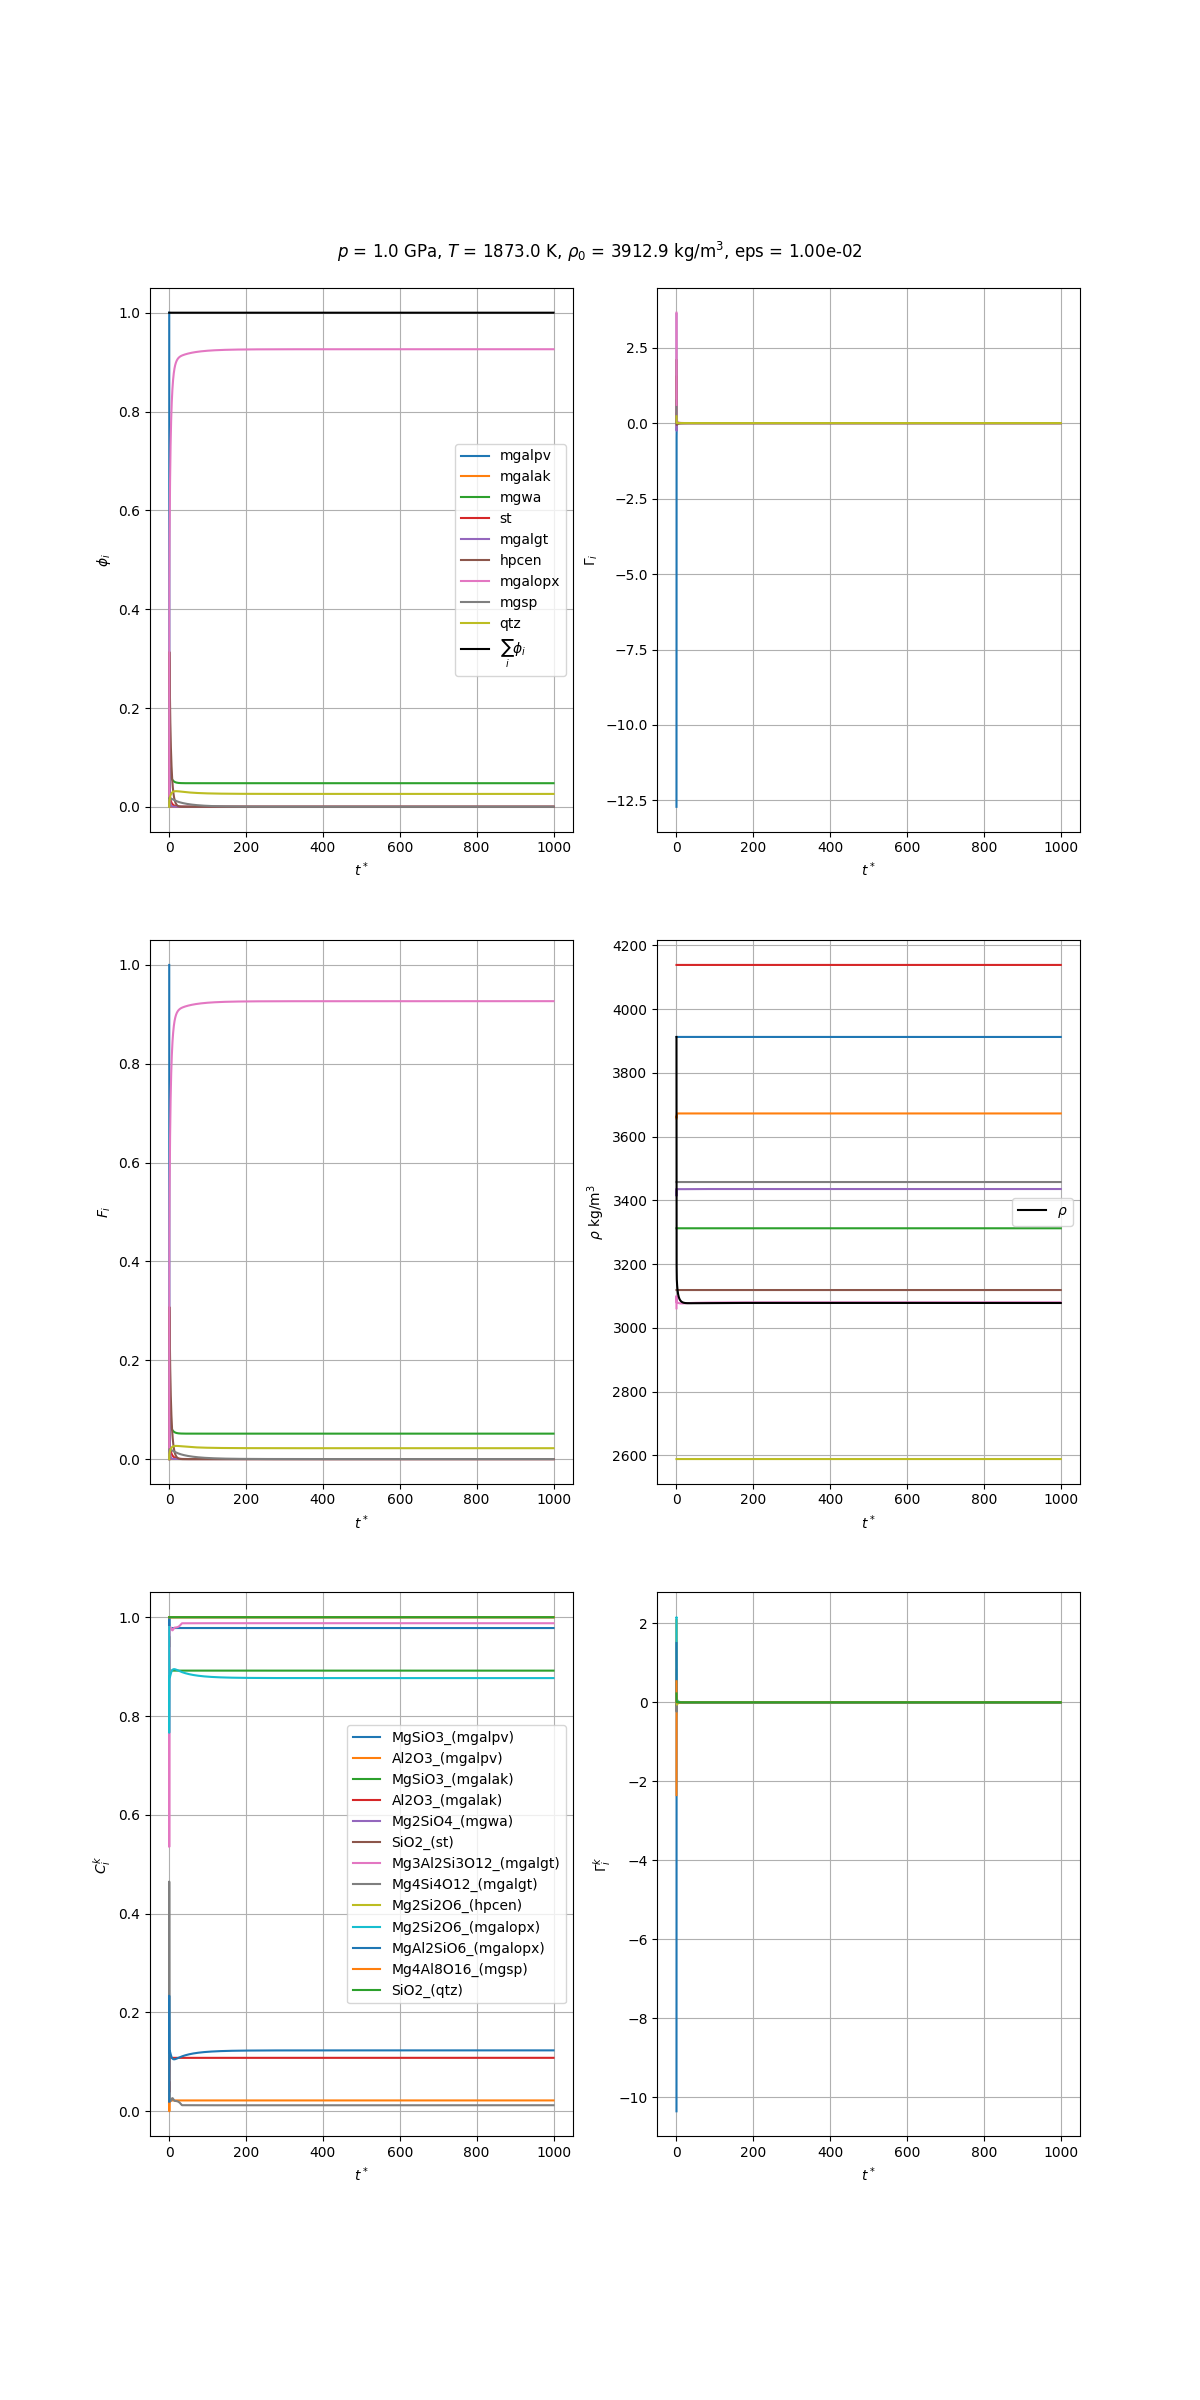

In [9]:
ode.plot()

## Solve for a grid

In [ ]:
import pickle
reload = True
if reload:
    pfile = open(os.path.join('output', 'petsc_bdfgrid_mgsialalo3_lowp.pickle'), 'rb')
    bdfgrid = pickle.load(pfile)
    pfile.close()
else:
    bdfgrid = PDReactiveGrid()
    bdfgrid.solve(rxn, PETScPDReactiveODE, Ti, 0, 0.0, 30.0, 60, 50, 1e6)
    pfile = open(os.path.join('output', 'petsc_bdfgrid_mgsialalo3_lowp.pickle'), 'wb')
    pickle.dump(bdfgrid, pfile)
    pfile.close()

In [ ]:
bdfdiag = PDReactiveGridDiagnostics(rxn,bdfgrid)

In [ ]:
bdfdiag.plot_phases()

In [ ]:
ode = bdfdiag.reconstruct_ode(23,0)

In [ ]:
ode.Cik0

In [ ]:
bdfdiag.plot_rho()

In [ ]:
bdfdiag.plot_stime()

In [ ]:
bdfdiag.plot_mindt()

In [ ]:
bdfdiag.plot_ndt()

In [ ]:
bdfdiag.plot_Xi1()